[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/path-to-your-notebook.ipynb)


# Download Dataset melalui Kaggle

In [ ]:
#from google.colab import files
#files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alifrachmat","key":"9db67d18d2f65c017273b4d357dd2c1c"}'}

In [ ]:
#!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 May 19 03:47 kaggle.json


In [ ]:
#!pip install -q kaggle 

In [ ]:
#!mkdir -p ~/.kaggle

#!cp kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets download -d theresalusiana/indonesian-food --force

 98% 663M/673M [00:07<00:00, 126MB/s]
100% 673M/673M [00:07<00:00, 91.9MB/s]


# Extract file Dataset yang sudah di-download

In [ ]:
#import zipfile

#local_zip = "./indonesian-food.zip"
#zip_ref = zipfile.ZipFile(local_zip,'r')#
#zip_ref.extractall()
#zip_ref.close()


In [ ]:
from google.colab import drive
import shutil

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#import os

#src = os.path.join("./dataset")
#dst = os.path.join("/content/drive/MyDrive/Dataset/")

#shutil.copytree(src,dst)

In [ ]:
import os

dataset_dir = "/content/drive/MyDrive/Dataset"
train_dir = os.path.join(dataset_dir,'train')
validation_dir = os.path.join(dataset_dir,'valid')
test_dir = os.path.join(dataset_dir,'test')

In [ ]:
print(os.listdir(train_dir))
print(os.listdir(validation_dir))
print(os.listdir(test_dir))

['bakso', 'gado', 'gudeg', 'rendang', 'sate']
['bakso', 'gudeg', 'sate', 'rendang', 'gado']
['gado', 'gudeg', 'sate', 'bakso', 'rendang']


In [ ]:
train_bakso_dir = os.path.join(train_dir, "bakso")
train_gado_dir = os.path.join(train_dir, "gado")
train_sate_dir = os.path.join(train_dir, "sate")
train_gudeg_dir = os.path.join(train_dir, "gudeg")
train_rendang_dir = os.path.join(train_dir, "rendang")

# Mengecek Jumlah Gambar untuk Training, Validation dan Test

In [ ]:
for dirs in os.listdir(train_dir):
  dir = os.path.join(train_dir, dirs)
  print("Jumlah Gambar {0} pada training set adalah {1}".format(dirs, len(os.listdir(dir))))

Jumlah Gambar bakso pada training set adalah 1726
Jumlah Gambar gado pada training set adalah 1720
Jumlah Gambar gudeg pada training set adalah 375
Jumlah Gambar rendang pada training set adalah 1731
Jumlah Gambar sate pada training set adalah 1708


In [ ]:
for dirs in os.listdir(validation_dir):
  dir = os.path.join(validation_dir, dirs)
  print("Jumlah Gambar {0} pada Validation set adalah {1}".format(dirs, len(os.listdir(dir))))

Jumlah Gambar bakso pada Validation set adalah 214
Jumlah Gambar gudeg pada Validation set adalah 47
Jumlah Gambar sate pada Validation set adalah 214
Jumlah Gambar rendang pada Validation set adalah 218
Jumlah Gambar gado pada Validation set adalah 209


In [ ]:
for dirs in os.listdir(test_dir):
  dir = os.path.join(test_dir, dirs)
  print("Jumlah Gambar {0} untuk pada test set adalah adalah {1}".format(dirs, len(os.listdir(dir))))

Jumlah Gambar gado untuk pada test set adalah adalah 216
Jumlah Gambar gudeg untuk pada test set adalah adalah 47
Jumlah Gambar sate untuk pada test set adalah adalah 214
Jumlah Gambar bakso untuk pada test set adalah adalah 214
Jumlah Gambar rendang untuk pada test set adalah adalah 222


# Mengecek ukuran gambar pada Dataset

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load the first example of a horse
sample_image  = load_img(f"{os.path.join(train_bakso_dir, os.listdir(train_bakso_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)
IMAGE_SIZE = sample_array.shape[0]
print(IMAGE_SIZE)
print(f"Each image has shape: {sample_array.shape}")

299
Each image has shape: (299, 299, 3)


# Buat Generator untuk Training, Validation dan Test

In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_test_generators(TRAINING_DIR, VALIDATION_DIR,TEST_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator: tuple containing the generators
  """

  train_datagen = ImageDataGenerator(rescale=1./255
                                     #rotation_range=40,
                                     #width_shift_range=0.2,
                                     #height_shift_range=0.2,
                                     #shear_range=0.2,
                                     #zoom_range=0.2,
                                     #horizontal_flip=True,
                                     #fill_mode='nearest'
                                     )


  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='categorical',
                                                      target_size=(IMAGE_SIZE,IMAGE_SIZE))


  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='categorical',
                                                                target_size=(IMAGE_SIZE, IMAGE_SIZE))
  
  test_generator = validation_datagen.flow_from_directory(directory=TEST_DIR,
                                                                batch_size=32, 
                                                                class_mode='categorical',
                                                                target_size=(IMAGE_SIZE, IMAGE_SIZE))
  ### END CODE HERE
  return train_generator, validation_generator, test_generator

In [ ]:
train_generator, validation_generator, test_generator = train_val_test_generators(train_dir, validation_dir, test_dir)

Found 7260 images belonging to 5 classes.
Found 902 images belonging to 5 classes.
Found 913 images belonging to 5 classes.


# Buat Model Pre-Trained MobileNet

In [ ]:
def pre_trained_model():
  pre_trained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(299,299,3))
  
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = pre_trained_model()
pre_trained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 150, 150, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 150, 150, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 150, 150, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 150, 150, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 150, 150, 32)     128       
 ation)                                         

In [ ]:
last_layer = pre_trained_model.output

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def __init__(self):
        self.threshold = 0.99
  def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= self.threshold:
            print(f"\nTraining stopped. Reached accuracy threshold")
            self.model.stop_training = True

callback = myCallback()
print(type(callback))

<class '__main__.myCallback'>


In [ ]:
def build_final_model(pre_trained_model, last_layer):
  x = tf.keras.layers.Flatten()(last_layer)
  x = tf.keras.layers.Dense(512,activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(5, activation='softmax')(x)

  model = tf.keras.models.Model(inputs=pre_trained_model.input,outputs=x)

  model.compile(optimizer = 'Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
                #callbacks=[callback()])
                )
  
  return model

In [ ]:
model = build_final_model(pre_trained_model, last_layer)

In [ ]:
def train_model(model,epochs,train_data,validation_data, verbose=1):
  model = model
  history = model.fit(train_data,
                    validation_data=validation_data,
                    steps_per_epoch=7260/32,
                    validation_steps=902/32,
                    epochs = epochs,
                    verbose = verbose,
                    callbacks=callback)
  return history

In [ ]:
history = train_model(model,20,train_generator,validation_generator)

Epoch 1/20
226/226 [==============================] - 3016s 13s/step - loss: 0.1972 - accuracy: 0.9409 - val_loss: 0.4059 - val_accuracy: 0.9069
Epoch 2/20
226/226 [==============================] - 58s 253ms/step - loss: 0.0823 - accuracy: 0.9740 - val_loss: 0.2340 - val_accuracy: 0.9390
Epoch 3/20
226/226 [==============================] - 60s 264ms/step - loss: 0.0500 - accuracy: 0.9853 - val_loss: 0.3517 - val_accuracy: 0.9435
Epoch 4/20
226/226 [==============================] - 60s 264ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.3427 - val_accuracy: 0.9435
Epoch 5/20
226/226 [==============================] - 57s 252ms/step - loss: 0.0839 - accuracy: 0.9792 - val_loss: 0.5398 - val_accuracy: 0.9069
Epoch 6/20
226/226 [==============================] - 57s 250ms/step - loss: 0.0482 - accuracy: 0.9868 - val_loss: 0.4057 - val_accuracy: 0.9424
Epoch 7/20
226/226 [==============================] - 56s 249ms/step - loss: 0.0494 - accuracy: 0.9853 - val_loss: 0.2957 - val_ac

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs = 20,
                    verbose = 1)

NameError: ignored

In [ ]:
history = history.history

print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


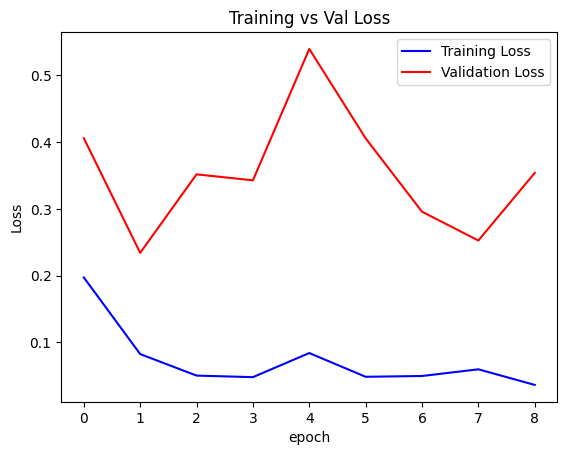

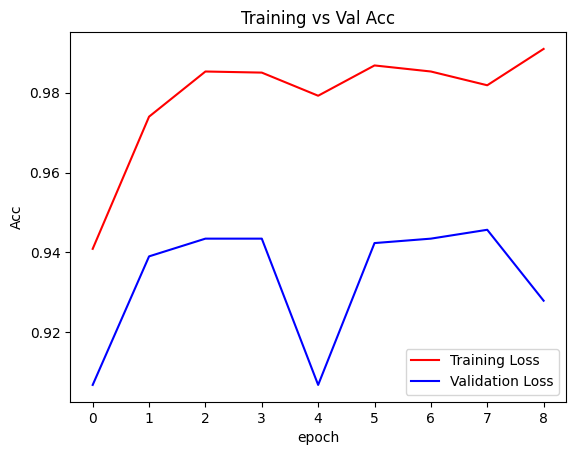

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))
plt.plot(epochs,loss,'b',label="Training Loss")
plt.plot(epochs,val_loss,'r',label="Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Val Loss")
plt.show()

plt.clf()
plt.plot(epochs,acc,'r',label="Training Loss")
plt.plot(epochs,val_acc,'b',label="Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Acc")
plt.legend()
plt.title("Training vs Val Acc")
plt.show()

In [ ]:
model.evaluate(test_generator)

29/29 [==============================] - 7s 247ms/step - loss: 0.3770 - accuracy: 0.9441


[0.37701883912086487, 0.9441401958465576]

In [ ]:
import numpy as np

In [ ]:
class_names = list(train_generator.class_indices)
print(class_names)


TEST_DIR = test_dir
for dirname, _, filenames in os.walk(TEST_DIR):
    if dirname is not TEST_DIR:
        last_dir = os.path.basename(os.path.normpath(dirname))
        correct = 0
        for idx, filename in enumerate(filenames):
            path = filename

            img = load_img(os.path.join(
                os.path.join(TEST_DIR, dirname), filename), target_size=(299, 299))
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            images = np.vstack([x])
            classes = model.predict(images, batch_size=32, verbose=0)
#             classes = loaded_model.predict(images, batch_size=BATCH_SIZE, verbose=0)
            score = tf.nn.softmax(classes[0])
            
            predicted_class = np.argmax(score)
            predicted_class_name = class_names[np.argmax(score)]

            if(last_dir==predicted_class_name): correct += 1
#             print("Image: ", filename)
#             print(
#                 "This image most likely belongs to {} with a {:.2f} percent confidence.\n"
#                 .format(predicted_class_name, 100 * np.max(score))
#             )
        
        print(f'untuk folder {last_dir}')
        print("Jumlah data",len(os.listdir(os.path.join(TEST_DIR, dirname))))
        print("Jumlah data benar", correct)
        print(
            "Akurasi {:.2f}\n"
            .format(100*(correct/len(os.listdir(os.path.join(TEST_DIR, dirname)))))
        )

['bakso', 'gado', 'gudeg', 'rendang', 'sate']
untuk folder gado
Jumlah data 216
Jumlah data benar 2
Akurasi 0.93

untuk folder gudeg
Jumlah data 47
Jumlah data benar 32
Akurasi 68.09

untuk folder sate
Jumlah data 214
Jumlah data benar 137
Akurasi 64.02

untuk folder bakso
Jumlah data 214
Jumlah data benar 0
Akurasi 0.00

untuk folder rendang
Jumlah data 222
Jumlah data benar 44
Akurasi 19.82

